Compare the T-S diagrams obtained from 2 different platforms.

In [1]:
import load_functions
import matplotlib.pyplot as plt
import os
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
%matplotlib inline
plt.style.use('../stylefiles/socib.mplstyle')

In [2]:
figdir = '/home/ctroupin/Pictures/SOCIB'
gliderfile = ("http://thredds.socib.es/thredds/dodsC/auv/glider/"
              "ideep00-ime_sldeep000/L1/2016/"
              "dep0018_ideep00_ime-sldeep000_L1_2016-07-12_data_rt.nc")
profilerfile = ("http://thredds.socib.es/thredds/dodsC/drifter/profiler_drifter/"
                "argo_drifter_apex009-scb_apex006/L1/2015/"
                "dep0001_argo-drifter-apex009_scb-apex006_L1_2015-11-27.nc")

# Load data

In [3]:
tempglider, psalglider = load_functions.load_glider_TS(gliderfile)
tempdrifter, psaldrifter = load_functions.load_profiler_TS(profilerfile)

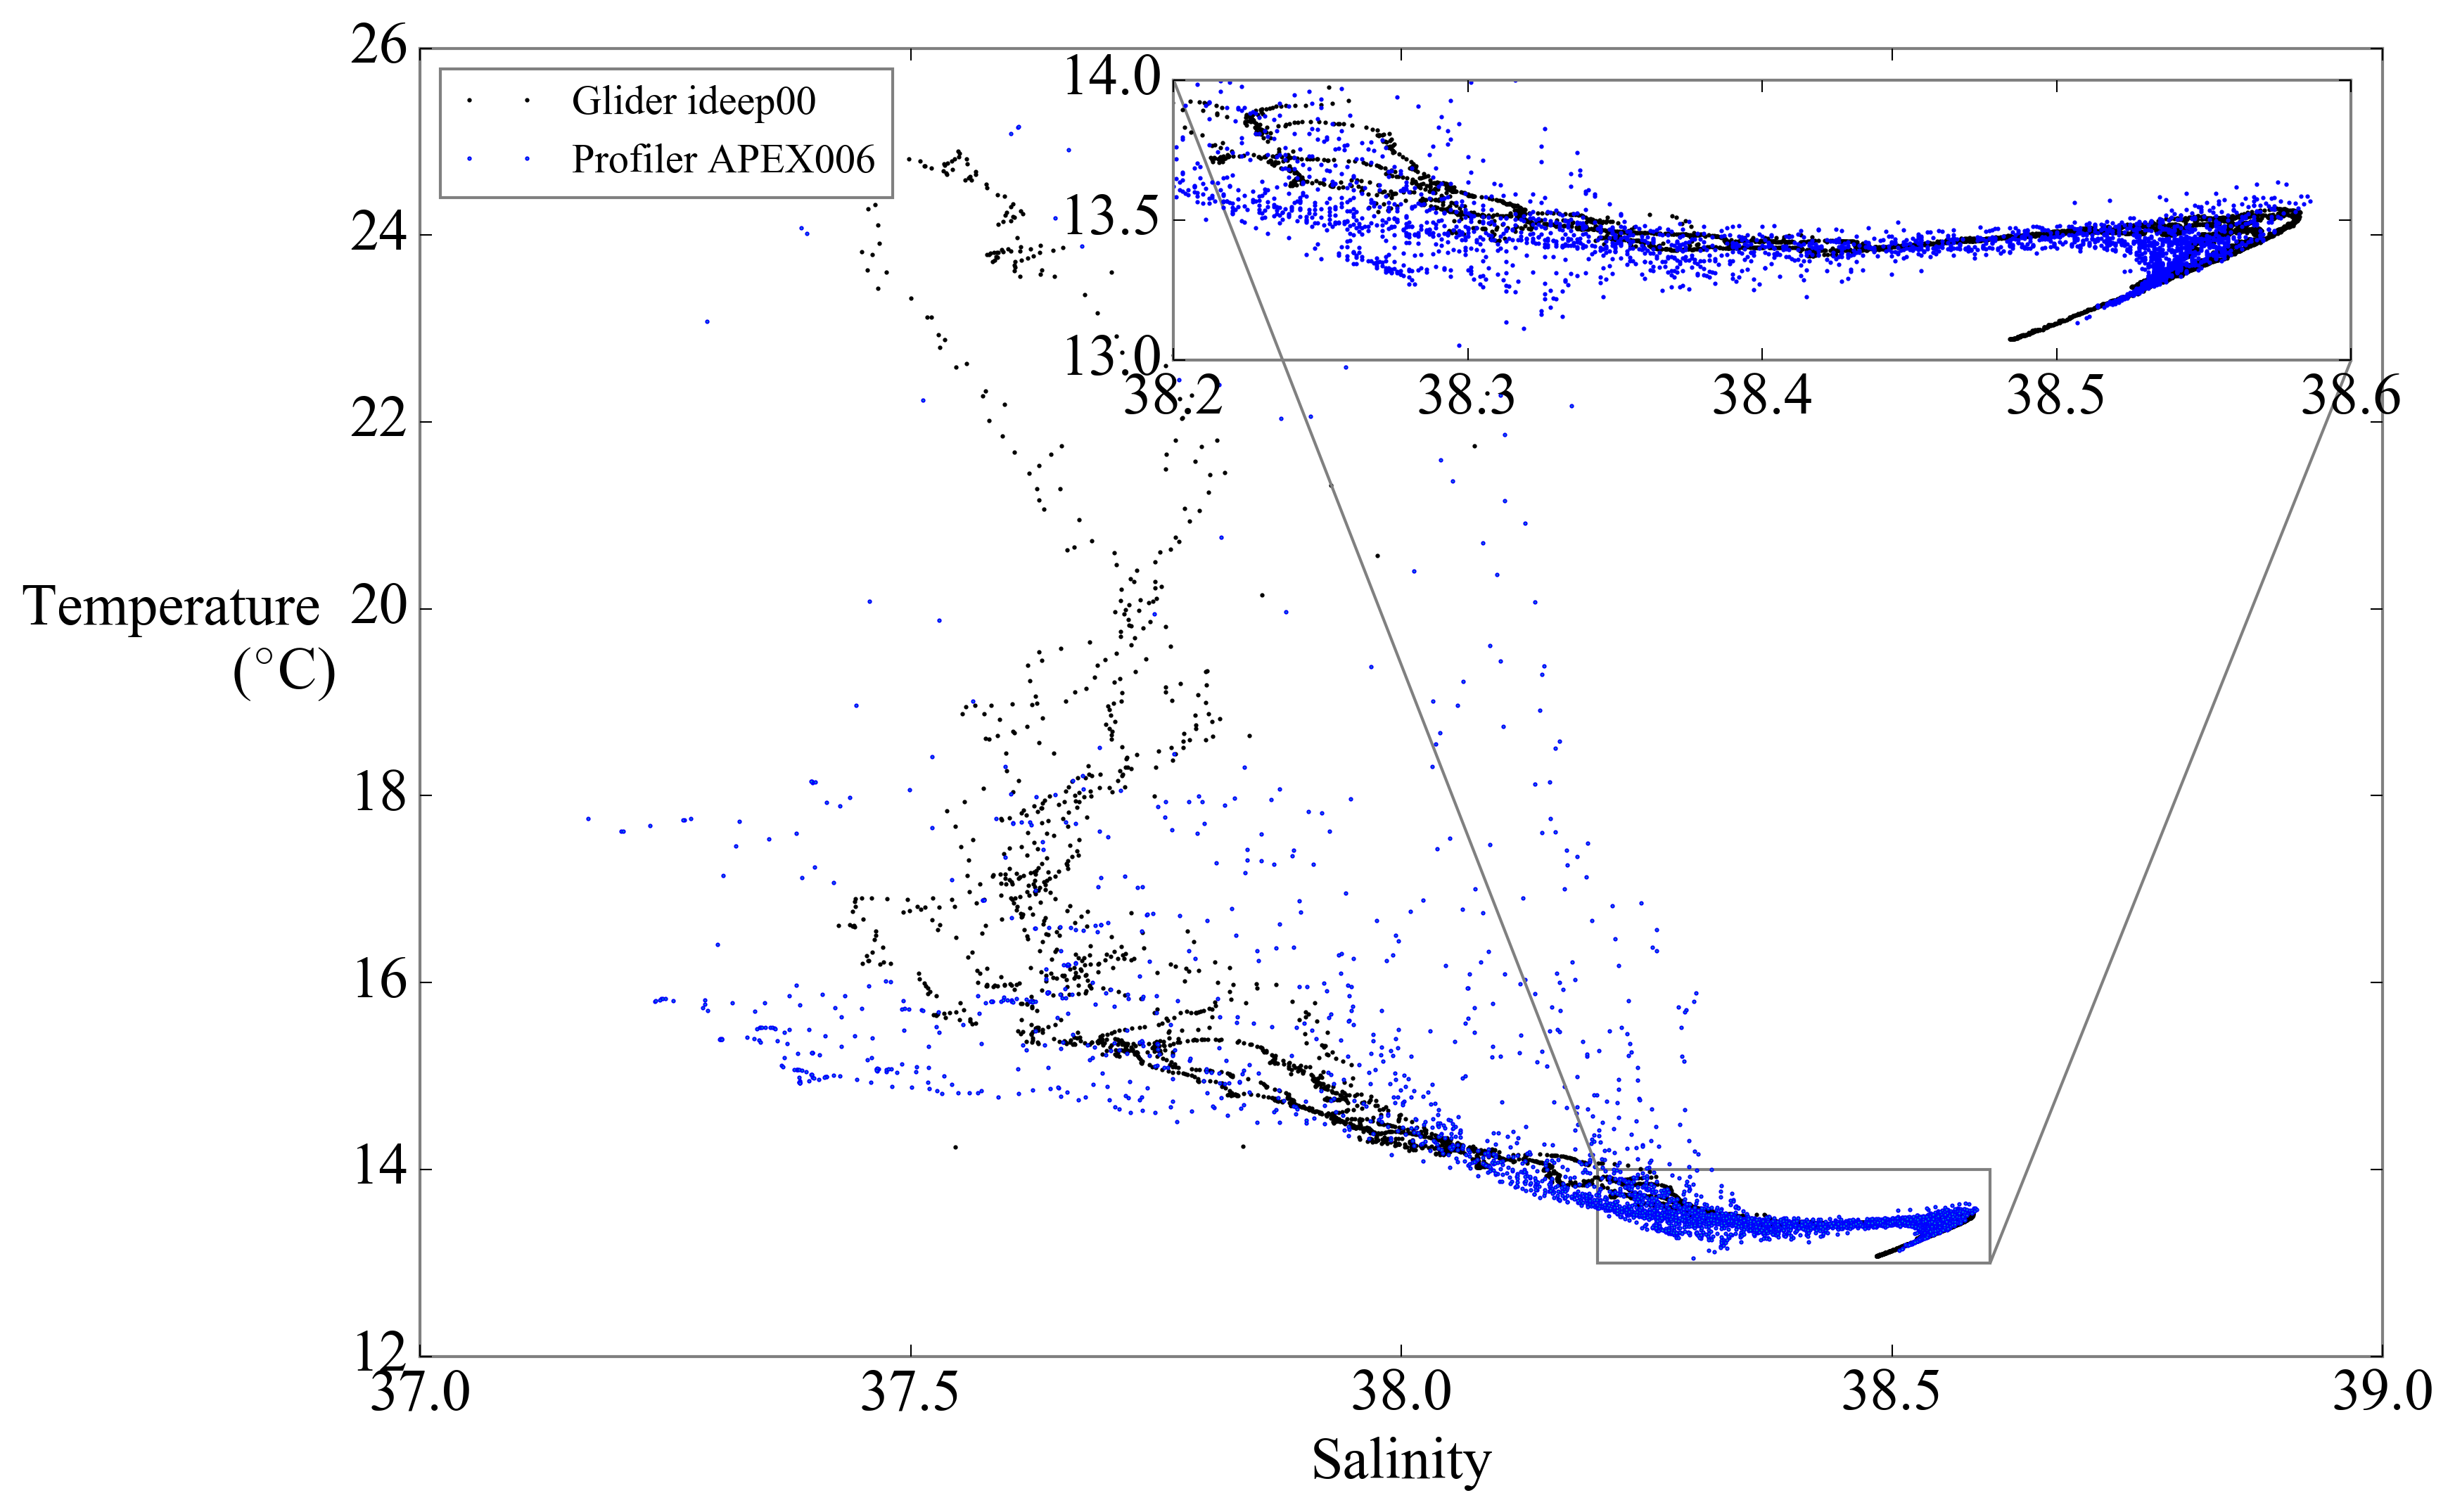

In [4]:
fig, ax = plt.subplots()
plt.plot(psalglider, tempglider, 'ko', ms=1, label='Glider ideep00')
plt.plot(psaldrifter.flatten(), tempdrifter.flatten(), 'co', ms=1, markeredgecolor='b', label='Profiler APEX006')
plt.legend(loc=2, fontsize=14)
plt.xlabel('Salinity')
plt.ylabel('Temperature \n($^{\circ}$C)', rotation=0, ha='right')
ax.set_xlim(37., 39.)
axins = zoomed_inset_axes(ax, 3, loc=1)  # zoom = 6
axins.plot(psalglider, tempglider, 'ko', ms=1)
axins.plot(psaldrifter, tempdrifter, 'bo', ms=1, markeredgecolor='b')

x1, x2, y1, y2 = 38.2, 38.6, 13., 14.
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

plt.xticks(np.linspace(x1, x2, 5))
plt.yticks(np.linspace(y1, y2, 3))
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

figname = os.path.join(figdir, 'glider_profiler_IbizaChannel')
#plt.savefig(figname)
plt.show()
plt.close()